<a href="https://www.kaggle.com/code/alimohtadi/dimension-reduction-on-digit-recognizer-and-fashio?scriptVersionId=132753470" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Applying dimension reduction on digit recognizer and fashion Mnist dataset
* purpose of this notebook is to find wich dimension reduction method work better on Mnist datasets

* I used PCA, LDA, MDS, IsoMap, TSNE and UMAP for reducing diminsion

* then I used seaborn scatterplot for visualization

In [10]:
#separate images from labels and turning them to numpy array
data_digit = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
X_digit = data_digit.drop(columns=['label']).to_numpy()
y_digit = data_digit['label'].to_numpy()

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap , MDS, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from umap import UMAP

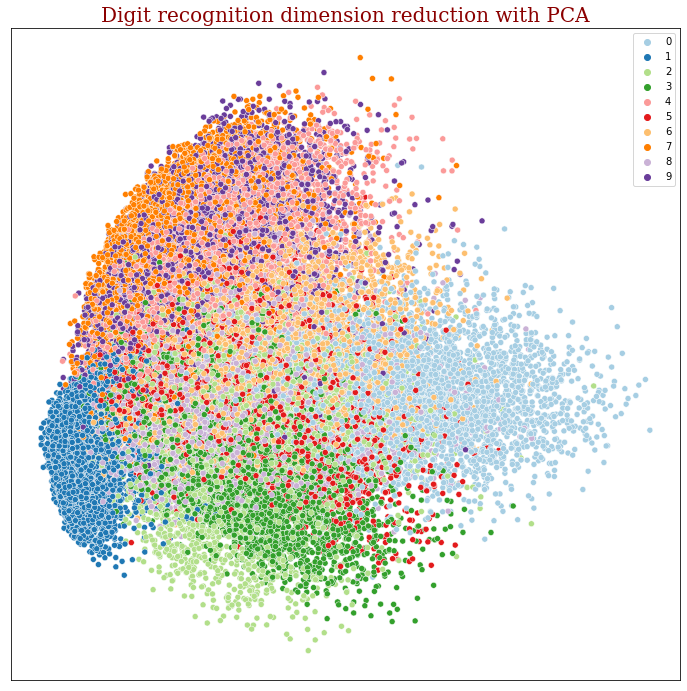

In [12]:
#using PCA
pca = PCA(n_components=2)
X_digit_pca = pca.fit_transform(X_digit)
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_digit_pca[:,0],y=X_digit_pca[:,1],hue=y_digit,palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Digit recognition dimension reduction with PCA',fontdict = {'family':'serif','color':'darkred','size':20});

PCA is super fast and efficient but couldn't separate our classes

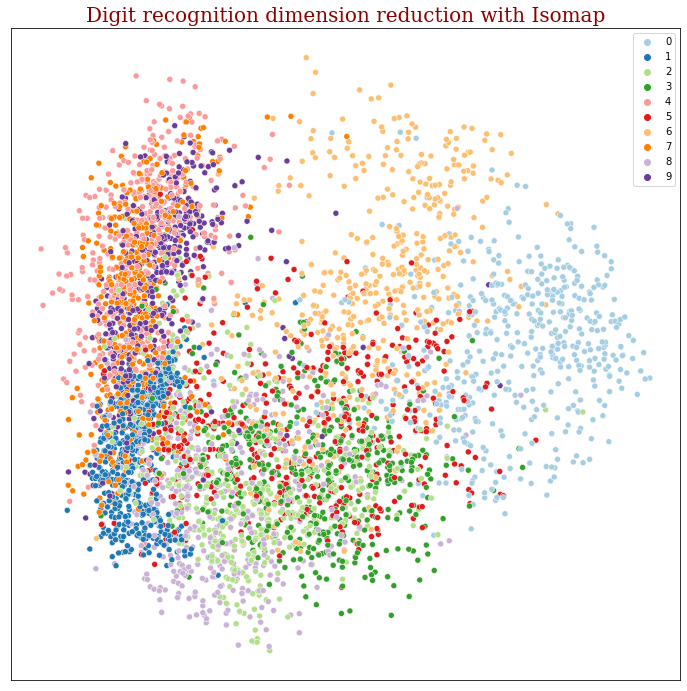

In [13]:
#using IsoMap
isomap = Isomap(n_components=2,n_neighbors=5)
X_digit_isomap = isomap.fit_transform(X_digit[:5000])
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_digit_isomap[:,0],y=X_digit_isomap[:,1],hue=y_digit[:5000],palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Digit recognition dimension reduction with Isomap',fontdict = {'family':'serif','color':'darkred','size':20});

IsoMap using lots of RAM so i just consider 5000 points and I assumed in whole dataset we should get similar result
as we see IsoMap couldn't separate our classes as well and we have similar result as PCA 

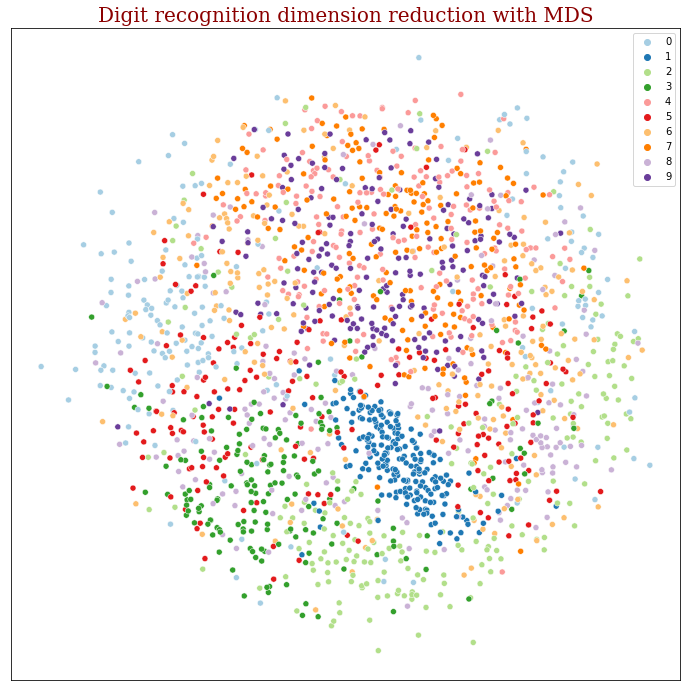

In [15]:
mds = MDS(n_components=2)
X_digit_mds = mds.fit_transform(X_digit[:2000])
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_digit_mds[:,0],y=X_digit_mds[:,1],hue=y_digit[:2000],palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Digit recognition dimension reduction with MDS',fontdict = {'family':'serif','color':'darkred','size':20});

MDS is using lots of RAM too so i just consider 5000 points and also I assumed in whole dataset we should get similar result and as we could see it didn't do a better job than PCA and IsoMap

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


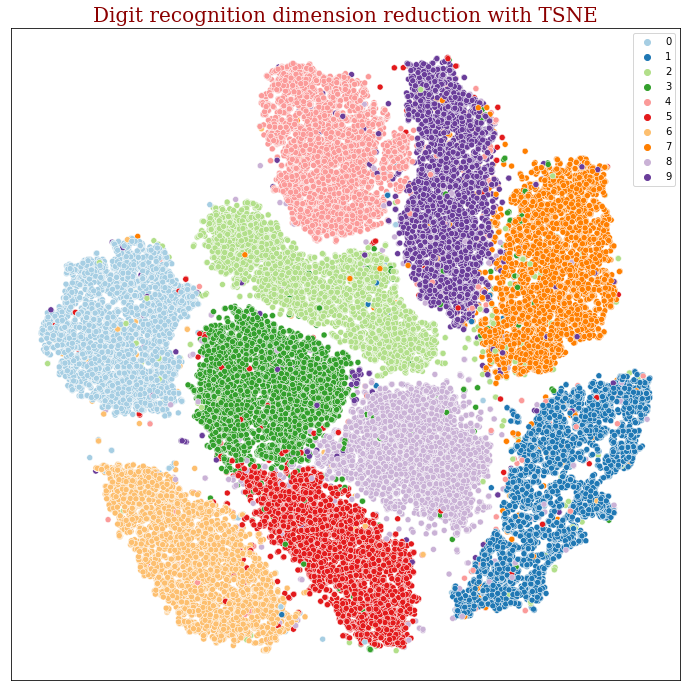

In [27]:
tsne = TSNE(n_components=2,early_exaggeration=8)
X_digit_tsne = tsne.fit_transform(X_digit)
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_digit_tsne[:,0],y=X_digit_tsne[:,1],hue=y_digit,palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Digit recognition dimension reduction with TSNE',fontdict = {'family':'serif','color':'darkred','size':20});

TSNE did a beautiful job here and separate our classes almost perfect but it was a little bit time consuming

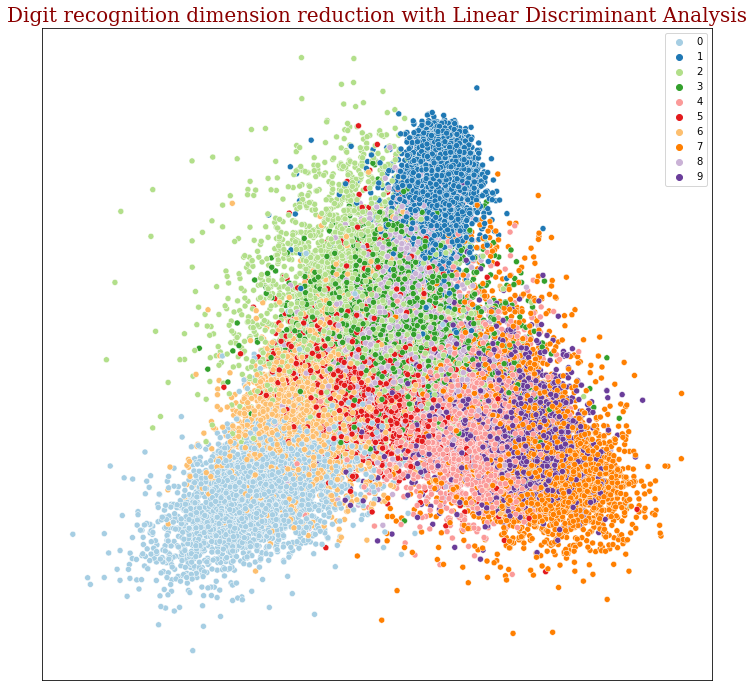

In [23]:
lda = LDA(n_components=2)
X_digit_lda = lda.fit_transform(X_digit,y_digit)
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_digit_lda[:,0],y=X_digit_lda[:,1],hue=y_digit,palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Digit recognition dimension reduction with Linear Discriminant Analysis',fontdict = {'family':'serif','color':'darkred','size':20});

LDA was fast but it didn't give a better result than PCA

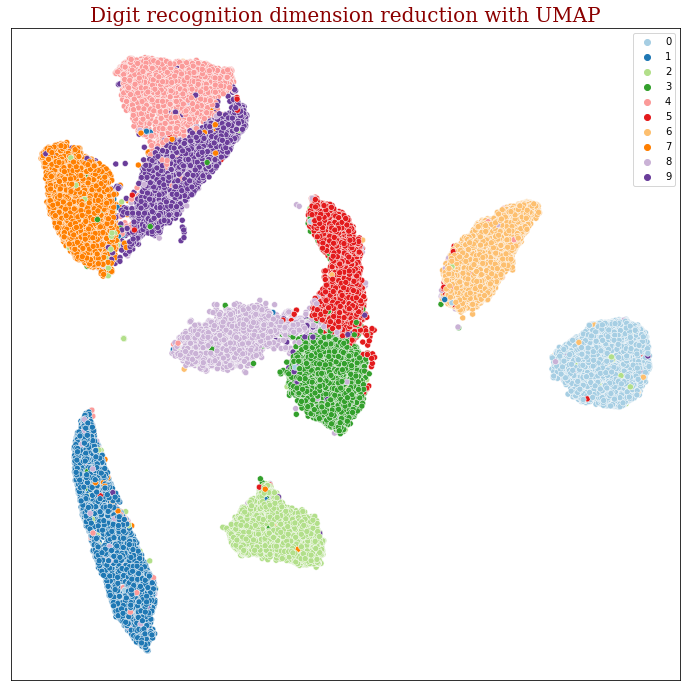

In [25]:
umap = UMAP()
X_digit_umap = umap.fit_transform(X_digit)
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_digit_umap[:,0],y=X_digit_umap[:,1],hue=y_digit,palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Digit recognition dimension reduction with UMAP',fontdict = {'family':'serif','color':'darkred','size':20});

UMAP could give us very good result and was faster than TSNE but I think TSNE give slightly better result

In [29]:
#separate images from labels and turning them to numpy array
data_fashion = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
X_fashion = data_fashion.drop(columns=['label']).to_numpy()
y_fashion = data_fashion['label'].to_numpy()

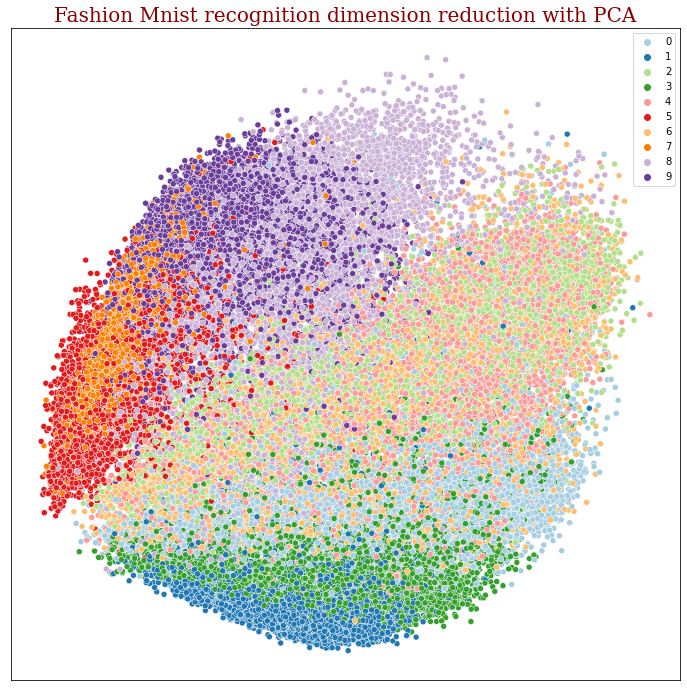

In [30]:
X_fashion_pca = pca.fit_transform(X_fashion)
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_fashion_pca[:,0],y=X_fashion_pca[:,1],hue=y_fashion,palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Fashion Mnist recognition dimension reduction with PCA',fontdict = {'family':'serif','color':'darkred','size':20});

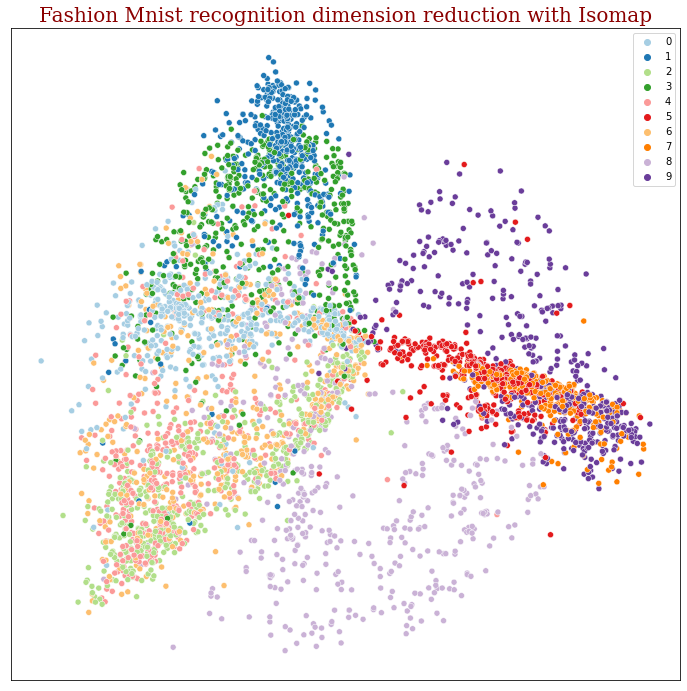

In [32]:
X_fashion_isomap = isomap.fit_transform(X_fashion[:5000])
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_fashion_isomap[:,0],y=X_fashion_isomap[:,1],hue=y_fashion[:5000],palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Fashion Mnist recognition dimension reduction with Isomap',fontdict = {'family':'serif','color':'darkred','size':20});

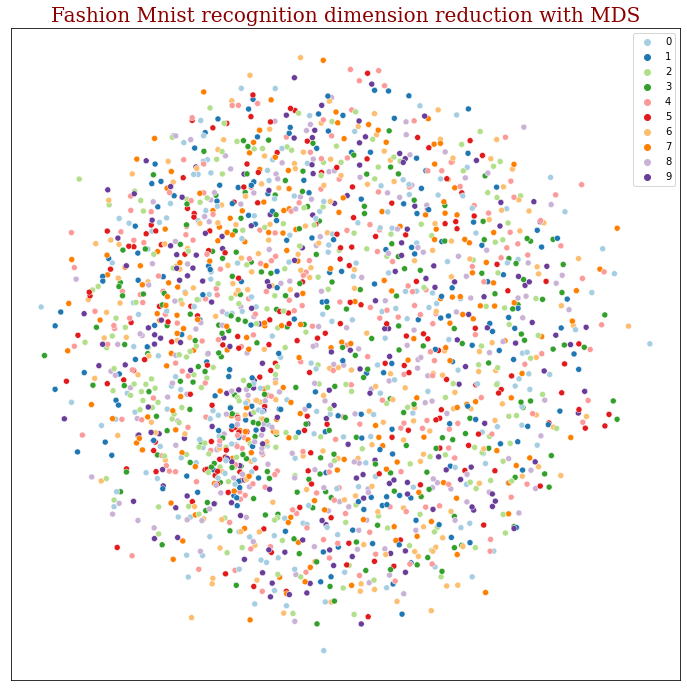

In [33]:
X_fashion_mds = mds.fit_transform(X_digit[:2000])
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_fashion_mds[:,0],y=X_fashion_mds[:,1],hue=y_fashion[:2000],palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Fashion Mnist recognition dimension reduction with MDS',fontdict = {'family':'serif','color':'darkred','size':20});

In [ ]:
X_fashion_lda = lda.fit_transform(X_fashion,y_fashion)
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_fashion_lda[:,0],y=X_fashion_lda[:,1],hue=y_fashion,palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Fashion Mnist recognition dimension reduction with Linear Discriminant Analysis',fontdict = {'family':'serif','color':'darkred','size':20});

as we expected PCA, MDS, LDA and IsoMap give us similar result as digit recognizer

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


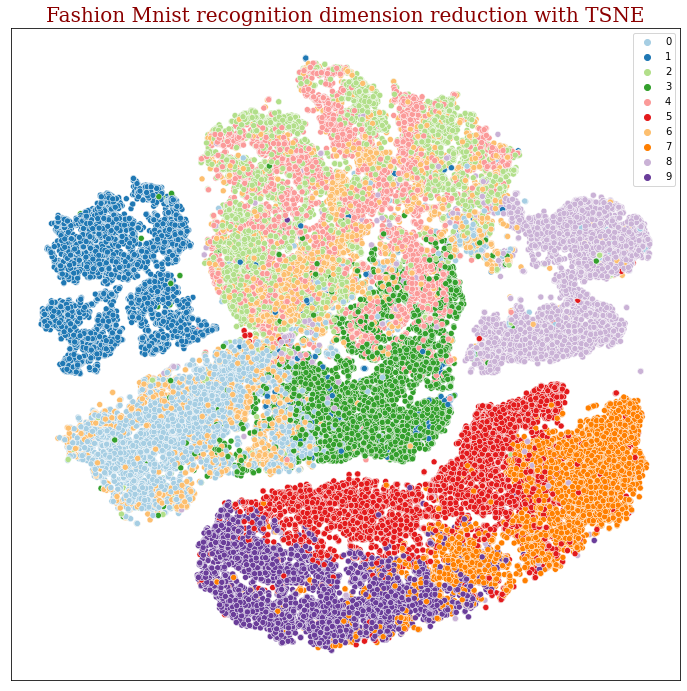

In [34]:
tsne = TSNE(n_components=2,early_exaggeration=8)
X_fashion_tsne = tsne.fit_transform(X_fashion)
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_fashion_tsne[:,0],y=X_fashion_tsne[:,1],hue=y_fashion,palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Fashion Mnist recognition dimension reduction with TSNE',fontdict = {'family':'serif','color':'darkred','size':20});

TSNE did better job but it seems Fashion Mnist it is harder dataset than digit recognizer in terns of classification


In [ ]:

X_fashion_umap = umap.fit_transform(X_fashion)
plt.figure(figsize=(12,12))
sns.scatterplot(x=X_fashion_umap[:,0],y=X_fashion_umap[:,1],hue=y_fashion,palette='Paired')
plt.xticks([])
plt.yticks([])
plt.title('Fashion Mnist dimension reduction with UMAP',fontdict = {'family':'serif','color':'darkred','size':20});

UMAP gives similar result as TSNE